In [60]:
# Import libs
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt


In [61]:

def solve_system(A, B, C, D):
    # Step 1: Rewrite as a linear algebraic system
    A_matrix = np.array([[A, -B], [C, -D]])
    
    # Step 2: Solve the eigenvalue problem
    eig_vals, eig_vecs = np.linalg.eig(A_matrix)
    
    # Step 3: Find the eigenvectors
    u1 = eig_vecs[:, 0]
    u2 = eig_vecs[:, 1]
    
    # Step 4: Find the solution of the system
    C1 = np.array([1, 1])
    try:
        C2 = np.linalg.solve(np.array([u1, u2]).T, C1)
    except np.linalg.LinAlgError:
        return None, None
    
    x = lambda t: C2[0]*np.exp(eig_vals[0]*t)*u1[0] + C2[1]*np.exp(eig_vals[1]*t)*u2[0]
    y = lambda t: C2[0]*np.exp(eig_vals[0]*t)*u1[1] + C2[1]*np.exp(eig_vals[1]*t)*u2[1]
    
    return x, y

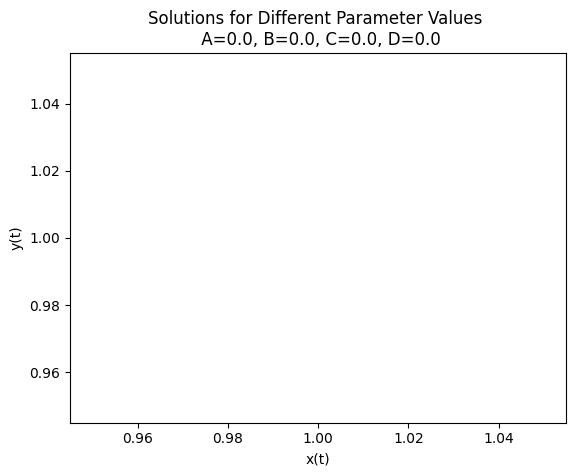

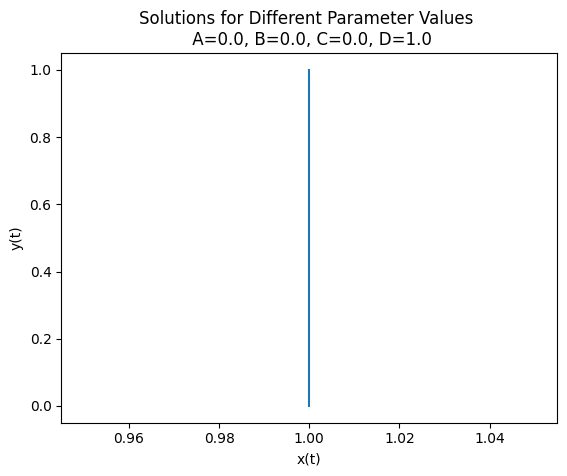

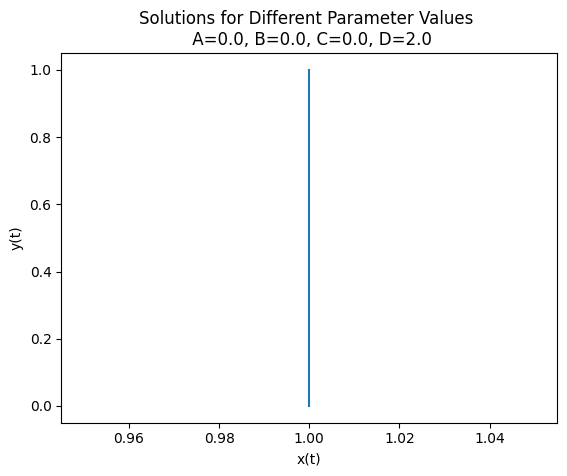

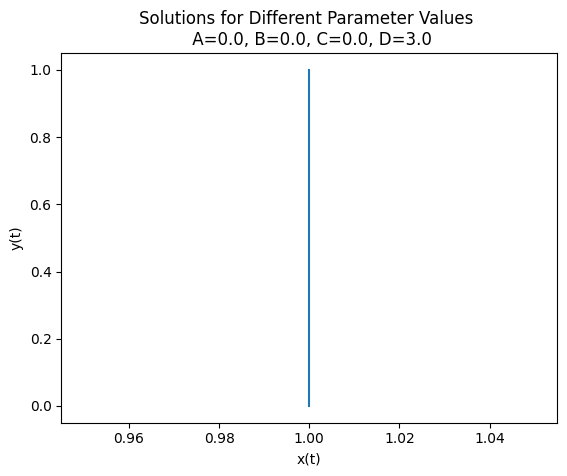

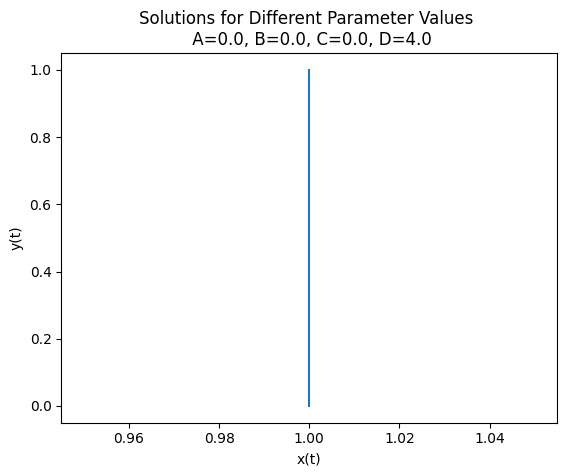

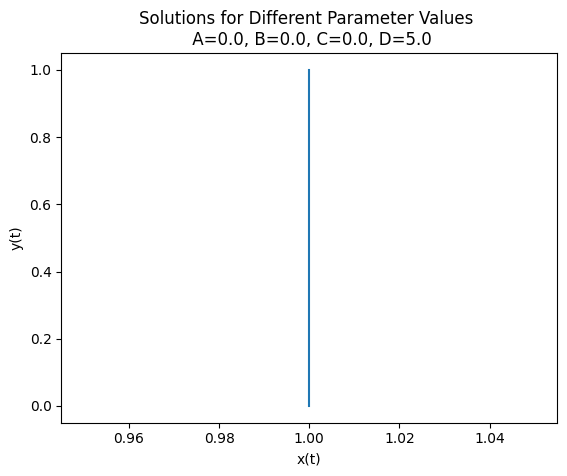

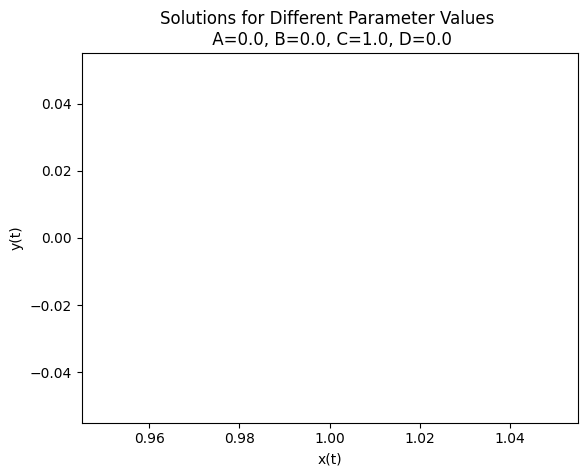

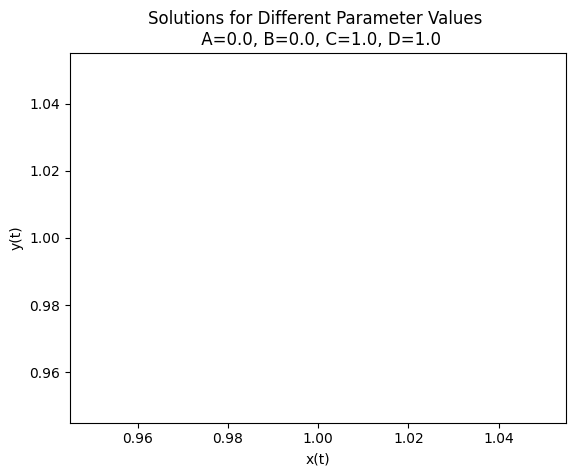

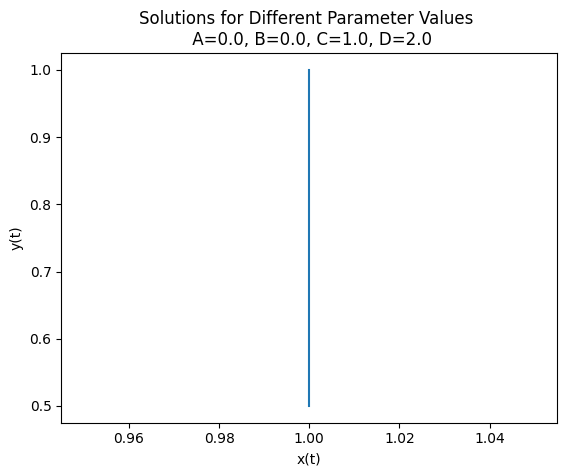

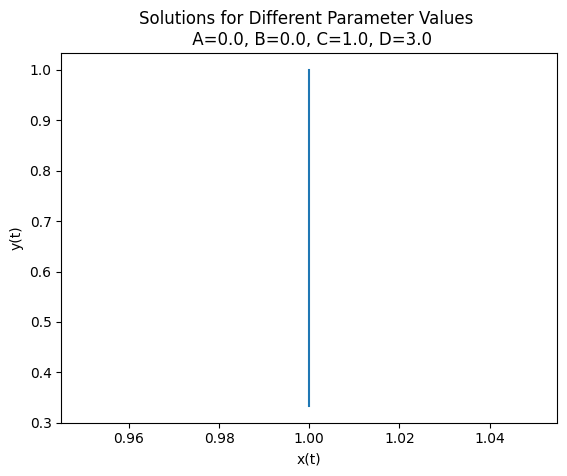

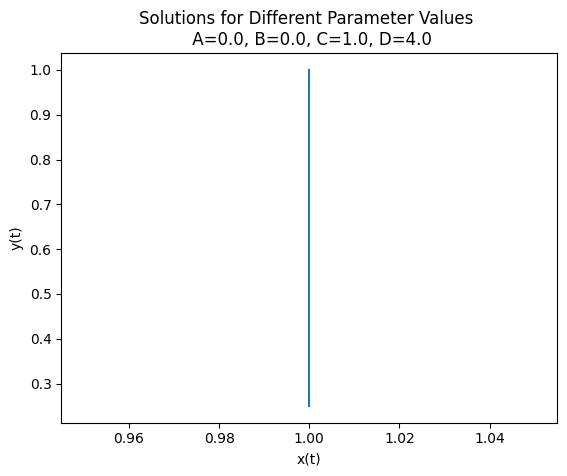

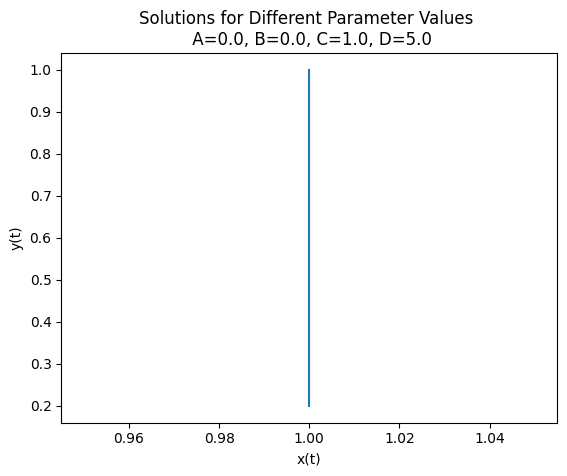

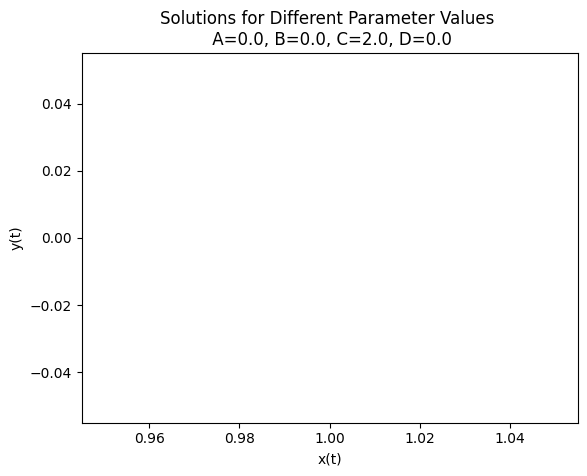

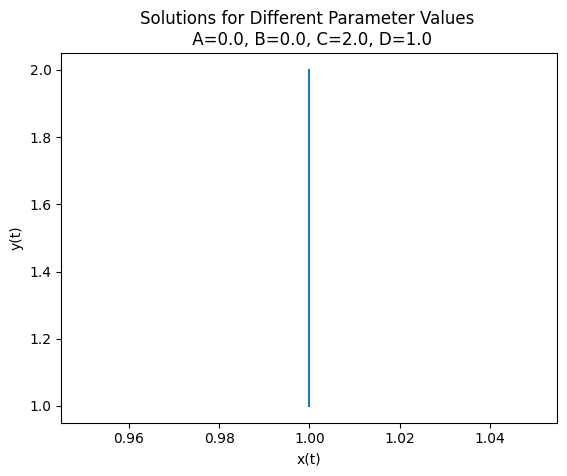

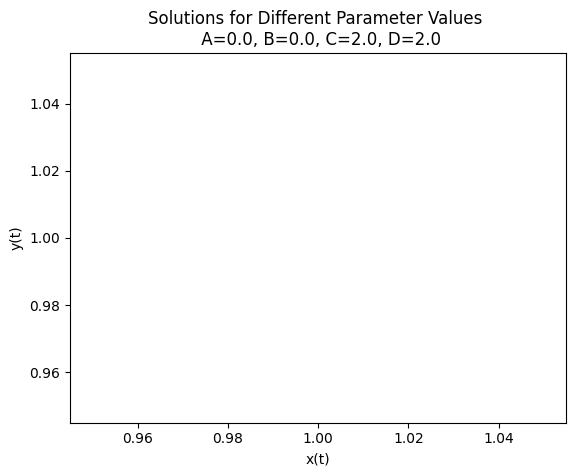

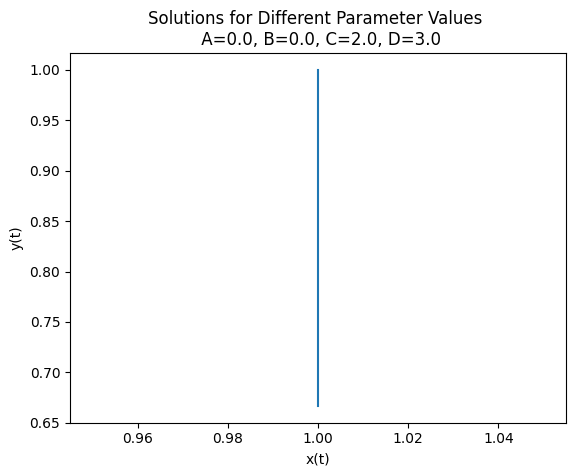

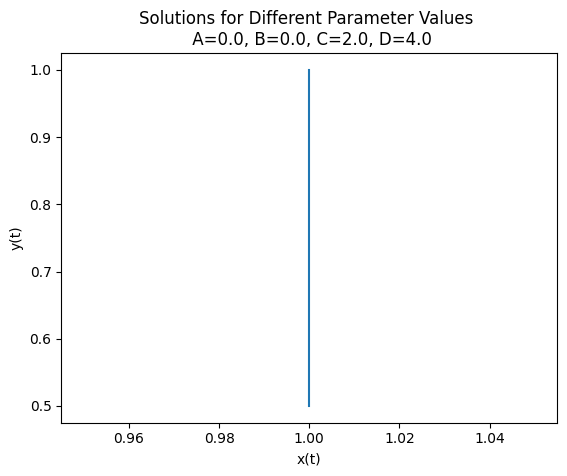

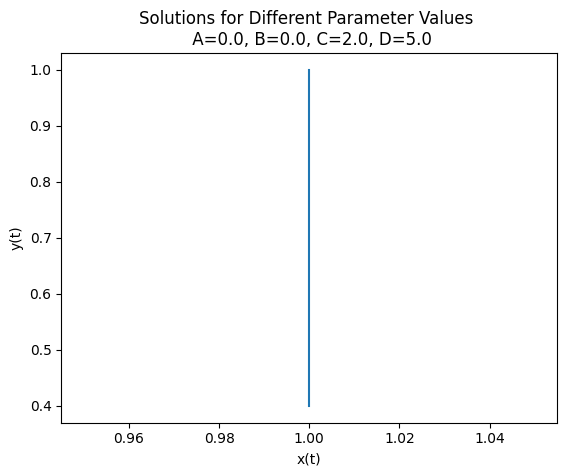

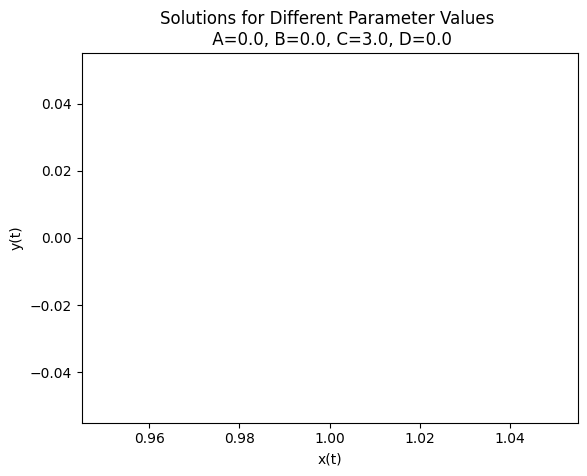

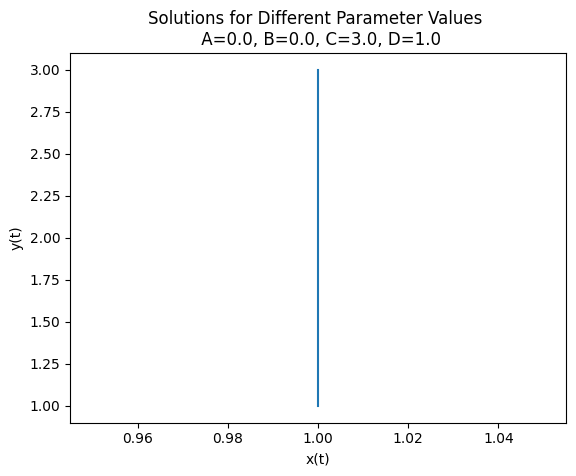

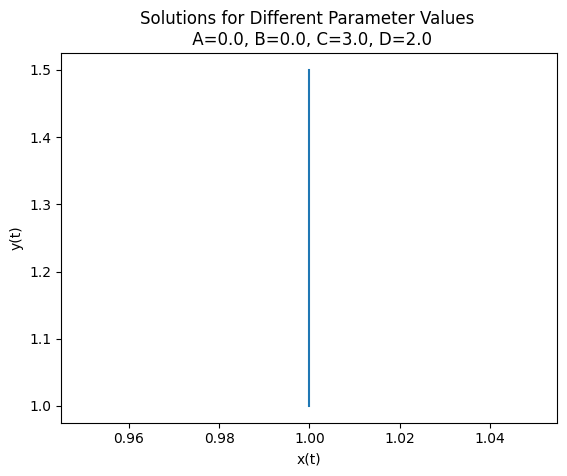

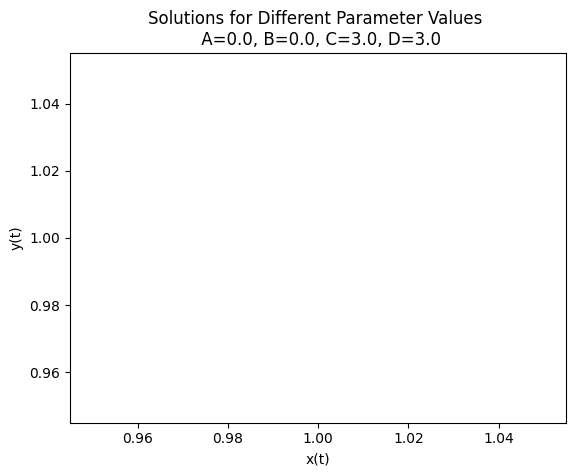

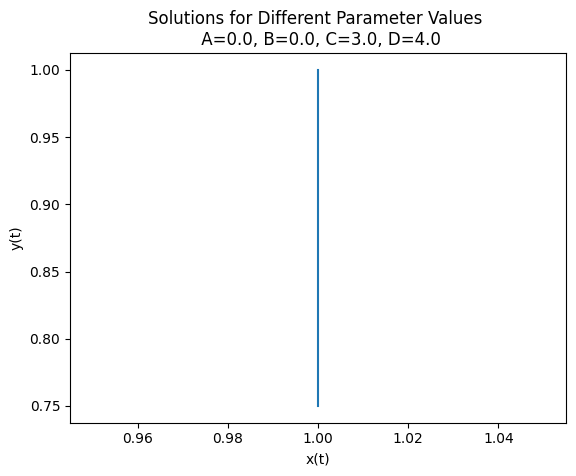

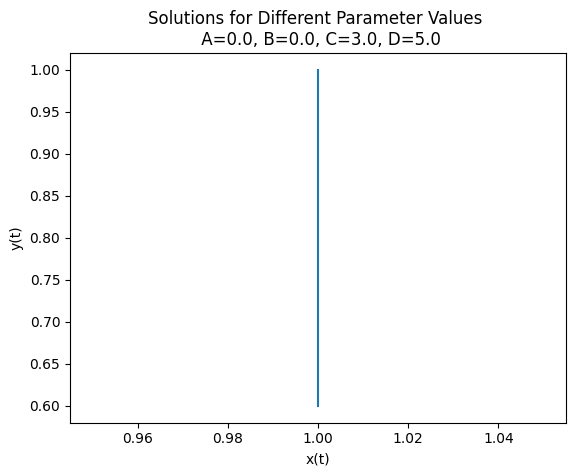

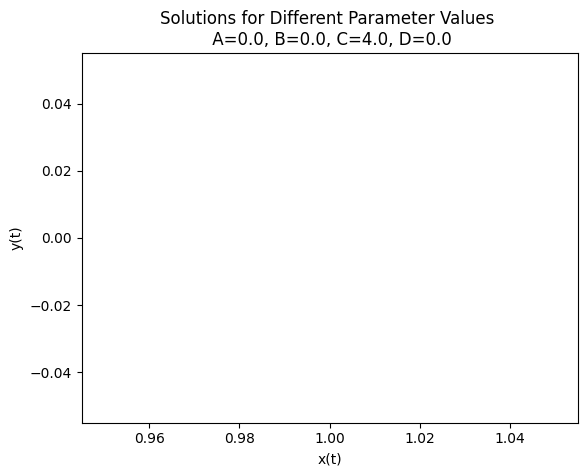

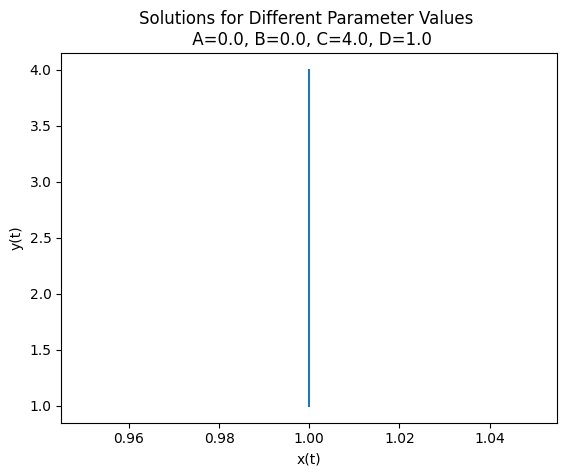

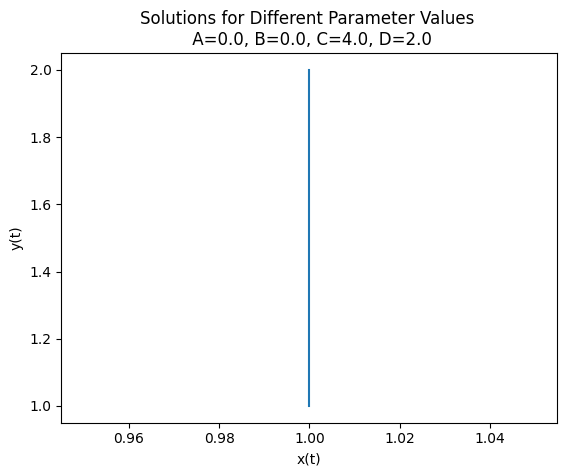

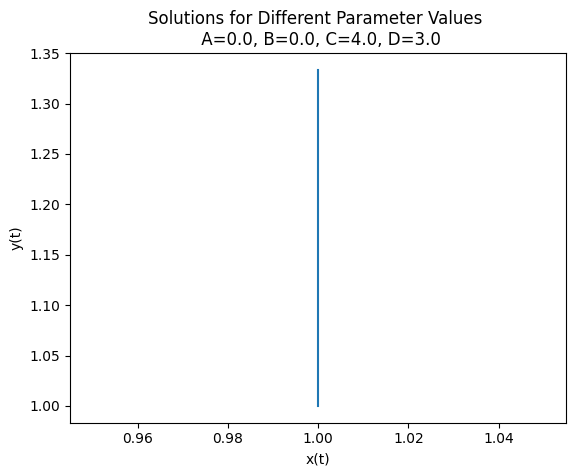

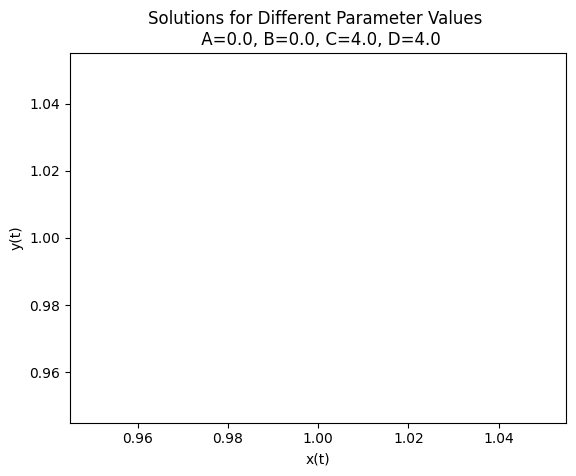

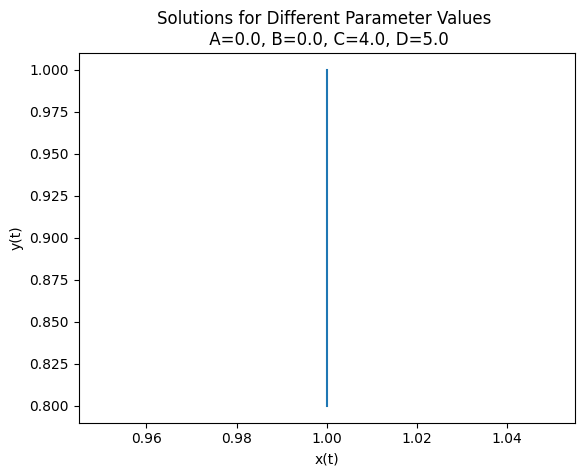

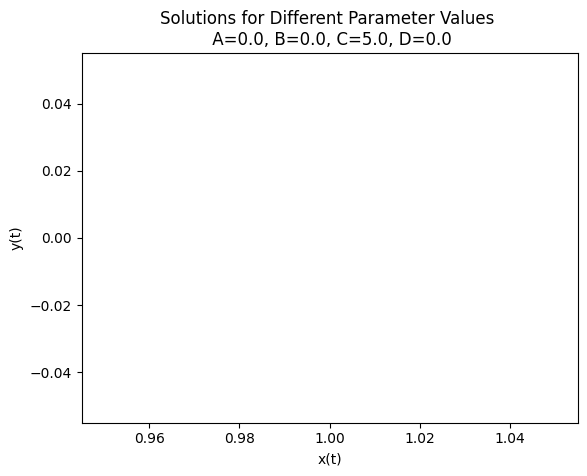

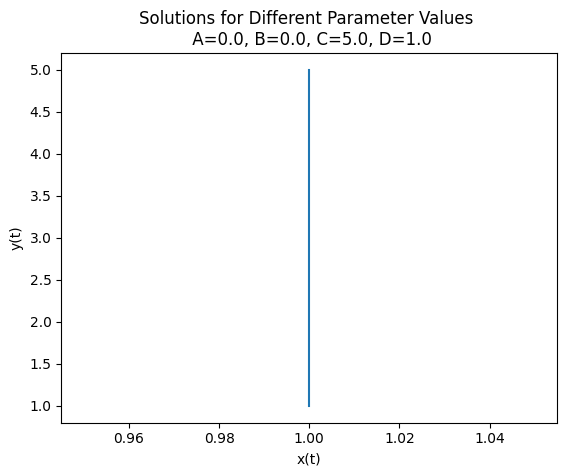

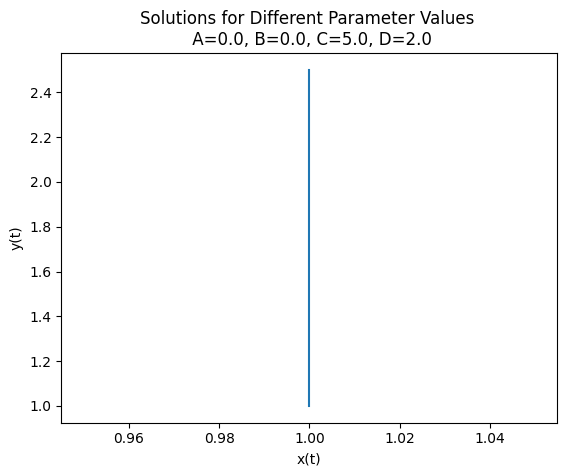

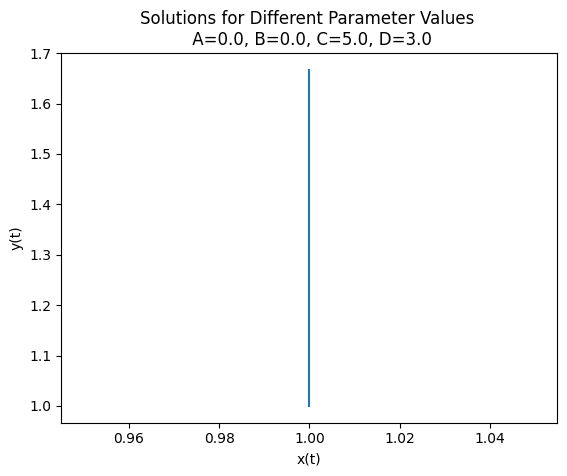

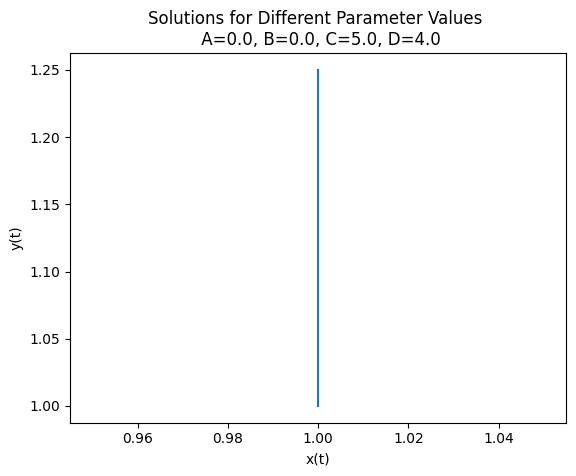

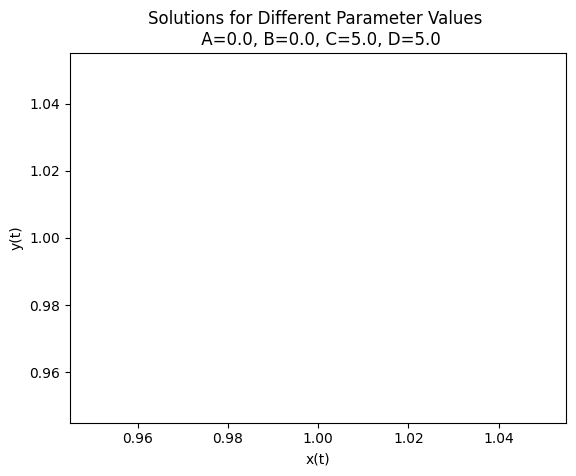

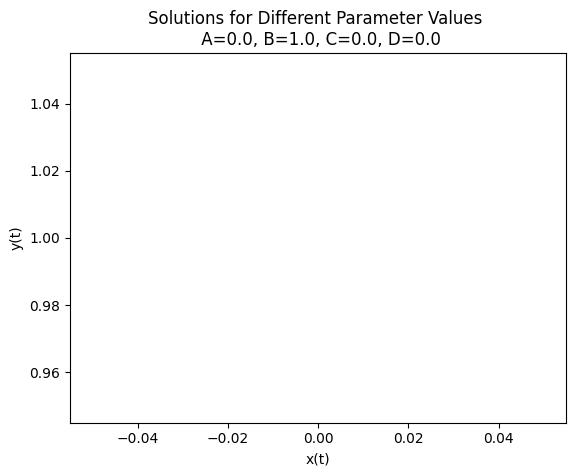

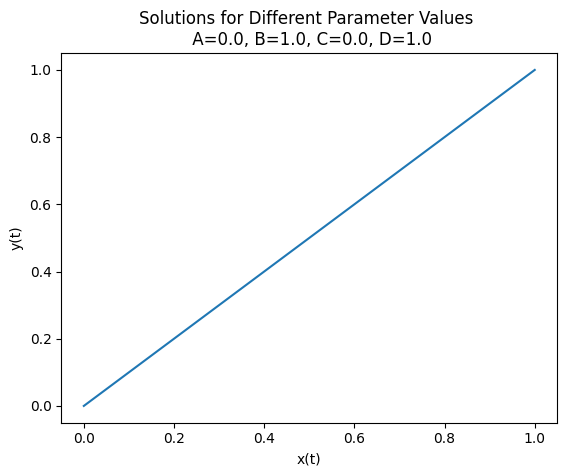

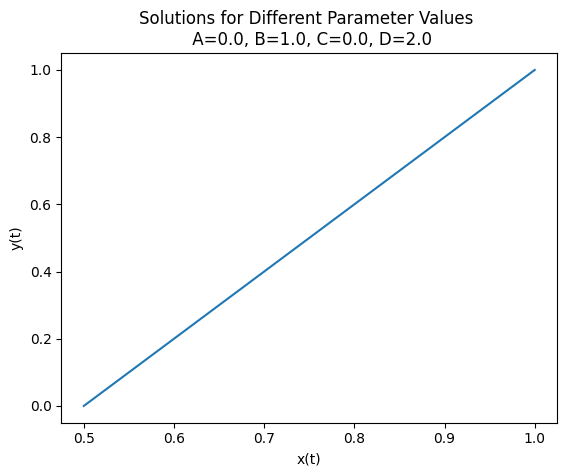

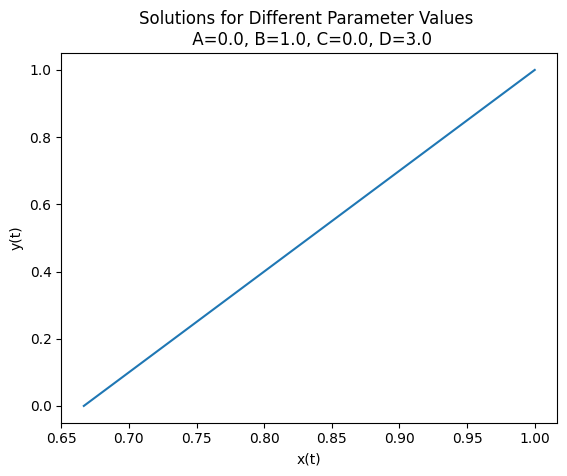

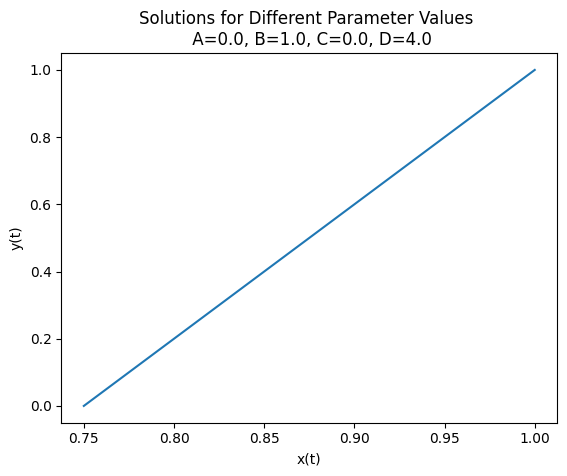

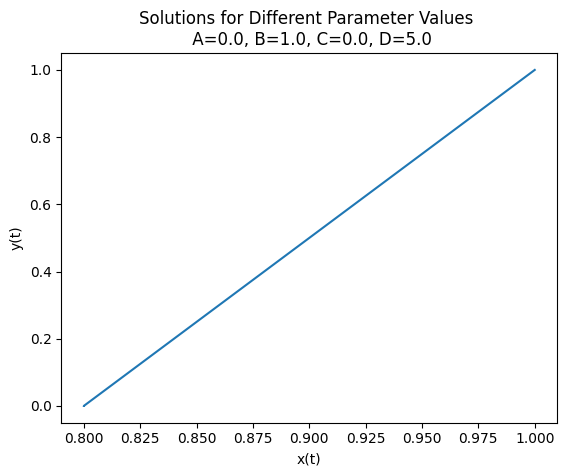

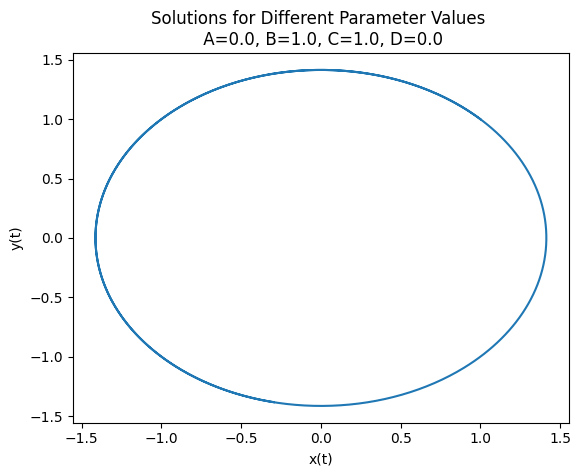

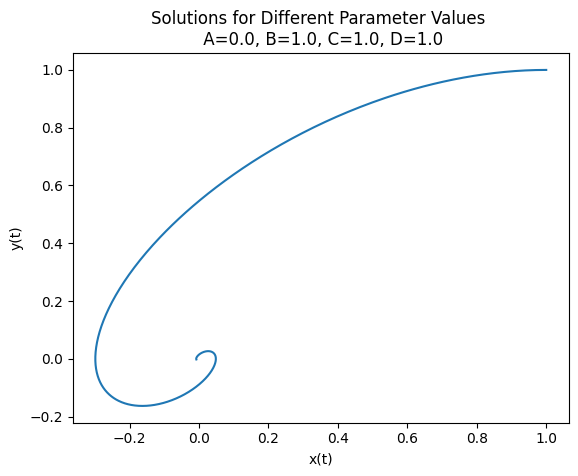

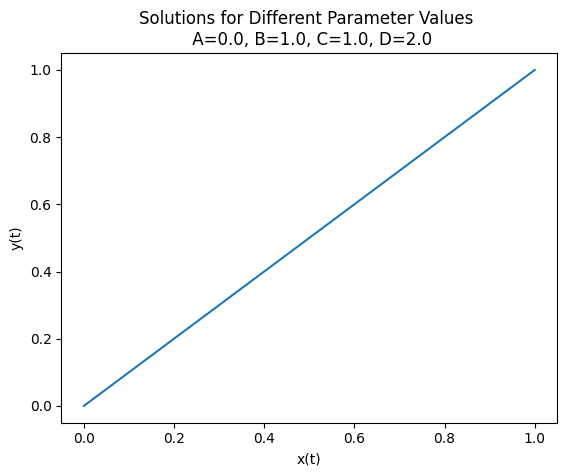

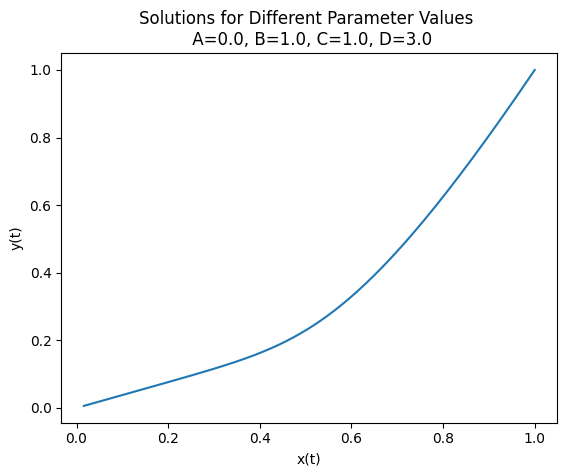

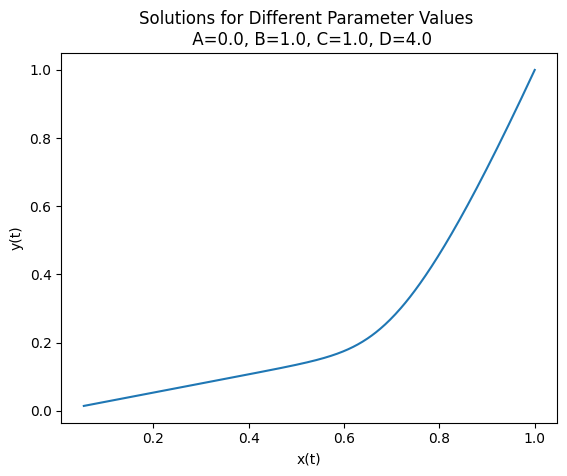

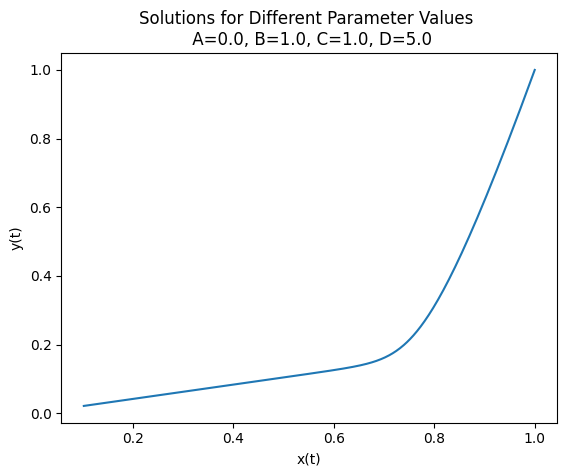

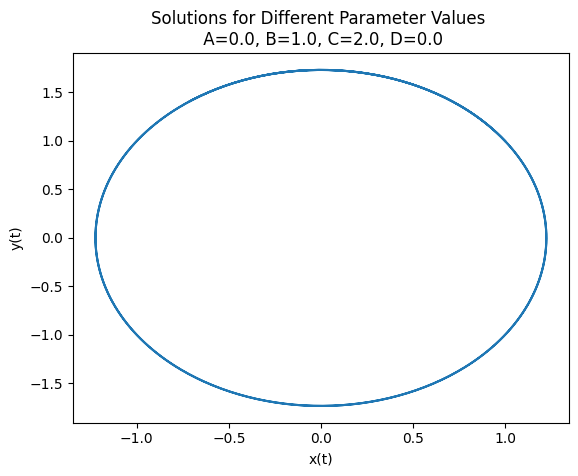

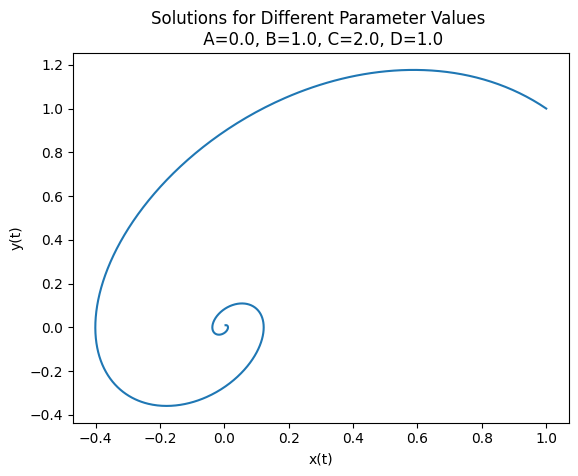

KeyboardInterrupt: 

<Figure size 640x480 with 0 Axes>

In [62]:
# Step 5: Investigate all possible solutions for different values of parameters
ts = np.linspace(0, 10, 1000)
for a in np.linspace(0, 5, 6):
    for b in np.linspace(0, 5, 6):
        for c in np.linspace(0, 5, 6):
            for d in np.linspace(0, 5, 6):
                x, y = solve_system(a, b, c, d)
                if x is not None and y is not None:
                    x_vals = [x(t) for t in ts]
                    y_vals = [y(t) for t in ts]
                    plt.plot(x_vals, y_vals)
                    plt.title(f'Solutions for Different Parameter Values \n A={a}, B={b}, C={c}, D={d}')
                    plt.xlabel('x(t)')
                    plt.ylabel('y(t)')
                    plt.show()